Hypothesis: spring or summer = higher prices
higher prices for older homes that are renovated recently?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
# dropping columns I know that I will not use in my modeling

data = data.drop(['id', 'view', 'lat', 'long', 'address'], axis=1)

In [6]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
dtype: object

In [7]:
data.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
dtype: int64

In [8]:
# dropping rows with null values
data.dropna(subset=['heat_source', 'sewer_system'], inplace=True)
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
dtype: int64

In [9]:
# encoding categorical data
data = pd.get_dummies(data, columns=['waterfront', 'nuisance', 'greenbelt', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True)
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [10]:
# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Create separate columns for 'month', 'year', and 'day'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

# Create binary features for seasons using 'month' column
data['season_winter'] = data['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
data['season_spring'] = data['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
data['season_summer'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
data['season_fall'] = data['month'].apply(lambda x: 1 if x in [9, 10, 11] else 0)

data = data.drop(['month', 'year', 'day', 'date'], axis=1)

In [11]:
data = data.astype('float64')

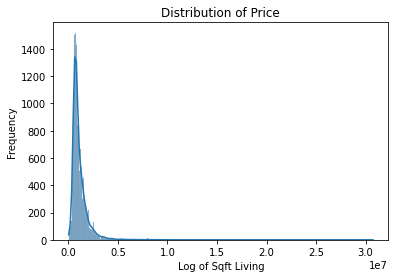

In [12]:
import seaborn as sns
# Plot histogram with distribution curve for 'sqft_living'
sns.histplot(data=data, x='price', kde=True)
plt.xlabel('Log of Sqft Living')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [13]:
data['price_log'] = np.log(data['price'])

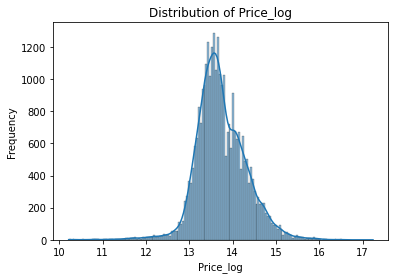

In [14]:
# Plot histogram with distribution curve for 'sqft_living'
sns.histplot(data=data, x='price_log', kde=True)
plt.xlabel('Price_log')
plt.ylabel('Frequency')
plt.title('Distribution of Price_log')
plt.show()

In [15]:
import datetime as dt

# Convert 'yr_built' to datetime format
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y')

# Calculate age feature
current_year = dt.datetime.now().year
data['house_age'] = current_year - data['yr_built'].dt.year

# Drop 'yr_built' column
data = data.drop('yr_built', axis=1)

# Print first 5 rows of transformed data
data['house_age'].head()


0    54
1    73
2    67
3    13
4    11
Name: house_age, dtype: int64

In [16]:
# Replace invalid values with NaN
data.loc[data['yr_renovated'] == 0, 'yr_renovated'] = np.nan

# Convert 'yr_renovated' to datetime format
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'], format='%Y', errors='coerce')

# Calculate renovation age
current_year = dt.datetime.now().year
data.loc[data['yr_renovated'].notnull(), 'renovation_age'] = \
    current_year - data.loc[data['yr_renovated'].notnull(), 'yr_renovated'].dt.year

# Fill NaN values with 0 for properties that haven't been renovated
data['renovation_age'].fillna(0, inplace=True)

# Drop 'yr_renovated' column
data = data.drop('yr_renovated', axis=1)

In [17]:
print(data['renovation_age'].max())
print(data['renovation_age'].min())

99.0
0.0


In [18]:
# creating a correlation matrix with all features with respect to 'price_log' 
corr_with_price = data.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price)


price_log                          1.000000
price                              0.829938
sqft_living                        0.621995
sqft_above                         0.548133
bathrooms                          0.516579
bedrooms                           0.345886
sqft_patio                         0.310324
sqft_garage                        0.284627
grade_9 Better                     0.283096
sqft_basement                      0.250487
grade_11 Excellent                 0.243749
floors                             0.234263
heat_source_Gas                    0.183354
grade_12 Luxury                    0.167870
waterfront_YES                     0.138596
season_spring                      0.116902
greenbelt_YES                      0.097182
grade_13 Mansion                   0.086235
sqft_lot                           0.084701
grade_8 Good                       0.068209
renovation_age                     0.039294
heat_source_Gas/Solar              0.036581
sewer_system_PUBLIC             

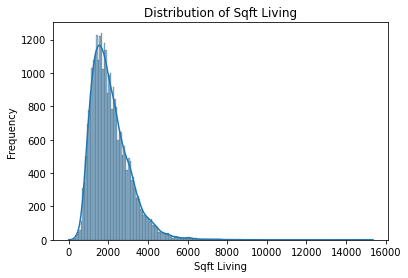

In [19]:
import seaborn as sns

# Plot histogram with distribution curve for 'sqft_living'
sns.histplot(data=data, x='sqft_living', kde=True)
plt.xlabel('Sqft Living')
plt.ylabel('Frequency')
plt.title('Distribution of Sqft Living')
plt.show()

In [20]:
data['log_sqft_living'] = np.log(data['sqft_living'])

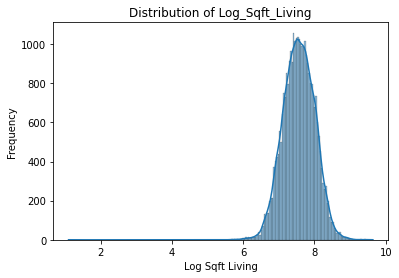

In [30]:

# Plot histogram with distribution curve for 'log_sqft_living'
sns.histplot(data=data, x='log_sqft_living', kde=True)
plt.xlabel('Log Sqft Living')
plt.ylabel('Frequency')
plt.title('Distribution of Log_Sqft_Living')
plt.show()

<Axes: xlabel='sqft_living', ylabel='price_log'>

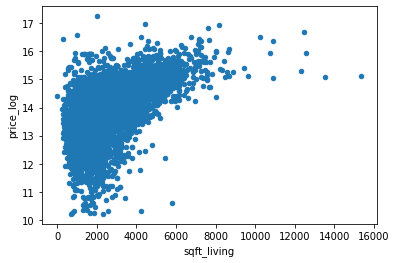

In [24]:
# Creating scatterplot of most correlated feature (sqft_living) vs price to visualize relationship
data.plot.scatter(x='sqft_living', y='price_log')

In [27]:
y = data['price']
x_base = data[['sqft_living']]

base_model = sm.OLS(y, sm.add_constant(x_base))
base_results = base_model.fit()

print(base_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:57:41   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


R-squared: This statistic measures the proportion of variance in the dependent variable (price) that is explained by the independent variable (sqft_living). In this case, the R-squared is 0.37, which means that the model accounts for 37% of the variation in house prices.

F-statistic: This is the test statistic for the overall significance of the model. In this case, the F-statistic is very large (17,710) and the associated p-value is 0. This indicates that the model is highly significant and that at least one of the independent variables is a useful predictor of the dependent variable.

Coefficients: The regression coefficient for sqft_living is 560.5134, which means that for every one-unit increase in living area, the model predicts an increase in price of $560.51. The coefficient for the intercept (const) is -75,590, which represents the predicted price of a house with zero living area (which is obviously not a realistic scenario).

Standard errors: These are estimates of the standard deviation of the coefficient estimates. They are used to calculate t-statistics and p-values.

t-statistics: These measure the number of standard errors that the estimated coefficients are from zero. In this case, the t-statistic for sqft_living is very large (133.096) and the associated p-value is 0, indicating that the coefficient is highly significant.

Confidence intervals: These represent the range of values that the true coefficient is likely to fall within, with a certain degree of confidence. In this case, we can say with 95% confidence that the true value of the coefficient for sqft_living falls between 552.259 and 568.768.

AIC and BIC: These are information criteria that provide a measure of the goodness of fit of the model, while penalizing for model complexity. In general, lower values indicate a better fit.

Omnibus, Durbin-Watson, Jarque-Bera, Skewness, Kurtosis: These are diagnostic tests that assess various assumptions of the regression model, such as normality of errors, autocorrelation, and heteroscedasticity. In this case, the large values of the Omnibus and Jarque-Bera tests suggest that the errors are not normally distributed, while the high values of skewness and kurtosis suggest that the distribution of errors is highly skewed and heavy-tailed. The Durbin-Watson test indicates that there is no significant autocorrelation in the residuals.

Condition number: This is a measure of the degree of multicollinearity in the model. A large condition number (above 30) indicates that there may be high correlations among the independent variables, which can lead to unstable estimates of the coefficients. In this case, the condition number is quite large (5,560), which suggests that there may be some multicollinearity issues in the model. However, since there is only one independent variable, this is not a major concern in this case.

In [32]:
y_log = data['price_log']
x_base_2 = data[['sqft_living']]

base_model_2 = sm.OLS(y_log, sm.add_constant(x_base_2))
base_results_2 = base_model_2.fit()

print(base_results_2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:05:35   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


This iteration shows an approximately 1.7% increase in R-squared value at 0.387, which means that the model accounts for 38.7% of the variation in the logarithm of house prices.

F-statistic: This is the test statistic for the overall significance of the model. In this case, the F-statistic is very large (19,000) and the associated p-value is 0. This indicates that the model is highly significant and that at least one of the independent variables is a useful predictor of the dependent variable.

Coefficients: The regression coefficient for sqft_living is 0.0004, which means that for every one-unit increase in living area, the model predicts a multiplicative increase in price of 1.0004 (or about 0.04% increase).

Interpretation of coefficients: The interpretation of the coefficient for sqft_living is different from the previous model, because it is now a multiplicative effect on the price, rather than an additive effect. In other words, a one-unit increase in living area is associated with a 0.04% increase in price, regardless of the initial price level. This transformation can make the model more interpretable and easier to compare with other models.


In [34]:
corr_with_price

price_log                          1.000000
price                              0.829938
sqft_living                        0.621995
sqft_above                         0.548133
bathrooms                          0.516579
bedrooms                           0.345886
sqft_patio                         0.310324
sqft_garage                        0.284627
grade_9 Better                     0.283096
sqft_basement                      0.250487
grade_11 Excellent                 0.243749
floors                             0.234263
heat_source_Gas                    0.183354
grade_12 Luxury                    0.167870
waterfront_YES                     0.138596
season_spring                      0.116902
greenbelt_YES                      0.097182
grade_13 Mansion                   0.086235
sqft_lot                           0.084701
grade_8 Good                       0.068209
renovation_age                     0.039294
heat_source_Gas/Solar              0.036581
sewer_system_PUBLIC             

In [35]:
x_base_3 = data[['sqft_living', 'season_spring']]

base_model_3 = sm.OLS(y_log, sm.add_constant(x_base_3))
base_results_3 = base_model_3.fit()

print(base_results_3.summary())

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.010e+04
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:11:25   Log-Likelihood:                -18702.
No. Observations:               30111   AIC:                         3.741e+04
Df Residuals:                   30108   BIC:                         3.743e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9075      0.006   2018.185

In [36]:
x_base_4 = data[['sqft_living', 'season_spring', 'renovation_age']]

base_model_4 = sm.OLS(y_log, sm.add_constant(x_base_4))
base_results_4 = base_model_4.fit()

print(base_results_4.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     6749.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:12:37   Log-Likelihood:                -18685.
No. Observations:               30111   AIC:                         3.738e+04
Df Residuals:                   30107   BIC:                         3.741e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9055      0.006   2016.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [44]:
x_base_5 = data[['sqft_living', 'sqft_patio', 'sqft_garage', 'season_spring', 'renovation_age', 'house_age', 'bathrooms']]

base_model_5 = sm.OLS(y_log, sm.add_constant(x_base_5))
base_results_5 = base_model_5.fit()

print(base_results_5.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     3090.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:16:13   Log-Likelihood:                -18277.
No. Observations:               30111   AIC:                         3.657e+04
Df Residuals:                   30103   BIC:                         3.664e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.7112      0.011   1159.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [ ]:
x_base_5 = data[['sqft_living', 'sqft_patio', 'sqft_garage', 'season_spring', 'renovation_age', 'house_age', 'bathrooms']]

base_model_5 = sm.OLS(y_log, sm.add_constant(x_base_5))
base_results_5 = base_model_5.fit()

print(base_results_5.summary())